### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.shape

(34299, 12)

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [5]:
application_df.shape

(34299, 10)

In [6]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [7]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [8]:
# Determine the number of unique values in each column.
# for col in application_df:
#    print(application_df[col].unique())
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
application_counts.describe()

count       17.000000
mean      2017.588235
std       6468.877251
min          1.000000
25%          3.000000
50%        156.000000
75%       1065.000000
max      27037.000000
Name: APPLICATION_TYPE, dtype: float64

<AxesSubplot:ylabel='Density'>

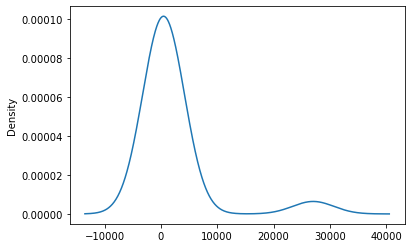

In [11]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [12]:
# list(application_counts[application_counts < 500].index)

In [13]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

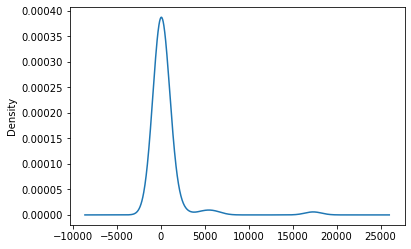

In [15]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [16]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
application_df.dtypes[application_df.dtypes == "object"]

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
dtype: object

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [19]:
application_df[application_cat]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,T5,Independent,C3000,ProductDev,Association,0,N


In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Kaalrok\anaconda3_1\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
#  Merge application_cat with application_df
application_df = application_df.merge(encode_df, left_index = True, right_index = True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
application_df.shape

(34299, 44)

In [23]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T10          34299 non-null  float64
 5   APPLICATION_TYPE_T19          34299 non-null  float64
 6   APPLICATION_TYPE_T3           34299 non-null  float64
 7   APPLICATION_TYPE_T4           34299 non-null  float64
 8   APPLICATION_TYPE_T5           34299 non-null  float64
 9   APPLICATION_TYPE_T6           34299 non-null  float64
 10  APPLICATION_TYPE_T7           34299 non-null  float64
 11  APPLICATION_TYPE_T8           34299 non-null  float64
 12  AFFILIATION_CompanySponsored  34299 non-null  float64
 13  A

In [24]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=['IS_SUCCESSFUL']).values
X

array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [25]:
y = application_df["IS_SUCCESSFUL"].values
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# testing
X_train[ :0]

array([], shape=(0, 43), dtype=float64)

### Deliverable 2: Compile, Train and Evaluate the Model

In [29]:
len(X_train[0])

43

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,621
Trainable params: 7,621
Non-trainable params: 0
_________________________________________________________________


### Implement some checkpoints
Create a callback that saves the model's weights every 5 epochs

In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

### Compile the model

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Create a callback that saves the model's weights every epoch (set to 5)
epoch = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

### Train the model

In [34]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
797/804 [============================>.] - ETA: 0s - loss: 73944.0625 - accuracy: 0.4860
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 1s 650us/step - loss: 100279.5703 - accuracy: 0.4867
Epoch 2/100
791/804 [============================>.] - ETA: 0s - loss: 53430.3398 - accuracy: 0.4957
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 651us/step - loss: 53537.1211 - accuracy: 0.4958
Epoch 3/100
795/804 [============================>.] - ETA: 0s - loss: 27847.4609 - accuracy: 0.5055
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 650us/step - loss: 27550.2305 - accuracy: 0.5061
Epoch 4/100
797/804 [============================>.] - ETA: 0s - loss: 27147.1660 - accuracy: 0.5033
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 647us/step - loss: 26922.4316 - accuracy: 0.5036
Epo

773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 34: saving model to checkpoints\weights.34.hdf5
804/804 [==============================] - 1s 668us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 35/100
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 1s 687us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 36/100
788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 1s 718us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 37/100
768/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 1s 733us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 38/100
782/804 [===================

Epoch 68/100
779/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 68: saving model to checkpoints\weights.68.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5303
Epoch 69/100
767/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 1s 987us/step - loss: 0.6916 - accuracy: 0.5321
Epoch 70/100
762/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 673us/step - loss: 0.6914 - accuracy: 0.5314
Epoch 71/100
791/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 1s 652us/step - loss: 0.6915 - accuracy: 0.5304
Epoch 72/100
753/804 [========

<AxesSubplot:>

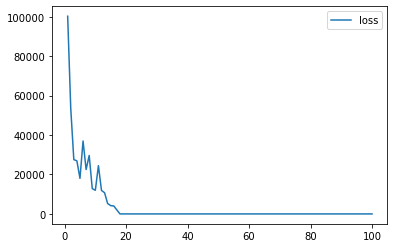

In [35]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

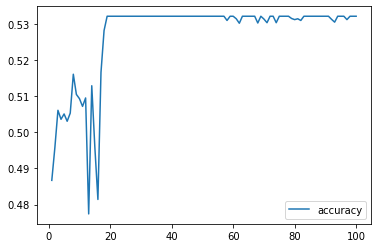

In [36]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6499 - accuracy: 0.6498 - 213ms/epoch - 793us/step
Loss: 0.6498503088951111, Accuracy: 0.6497958898544312


In [38]:
# Export our model to HDF5 file
nn.save("./Trained_models/AlphabetSoupCharity_D2.h5")

In [41]:
history_df.to_csv("./Data/D2_history_df.csv")

In [40]:
history_df.head()

,loss,accuracy
1,100279.570312,0.486705
2,53537.121094,0.495763
3,27550.230469,0.506103
4,26922.431641,0.503615
5,18029.367188,0.505093
